**INTRODUCTION**
Predict whether income exceeds $50K/yr based on census data.

**Attribute Information:**

**age:** continuous.

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
**education-num:** continuous.

**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**gender:** Female, Male.

**capital-gain:** continuous.

**capital-loss:** continuous.

**hours-per-week:** continuous.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**fnlwgt:** continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.We use 3 sets of controls.
 These are:
A single cell estimate of the population 16+ for each state.
Controls for Hispanic Origin by age and gender.
Controls by Race, age and gender.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**GET THE DATA**

In [ ]:
data=pd.read_csv(r"adult.csv")

**DESCRIPTIVE** **ANALYSIS**

In [ ]:
data.shape

(48842, 15)

In [ ]:
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**EXPLORATORY** **DATA** **ANALYSIS** **&** **PREPROCESSING**

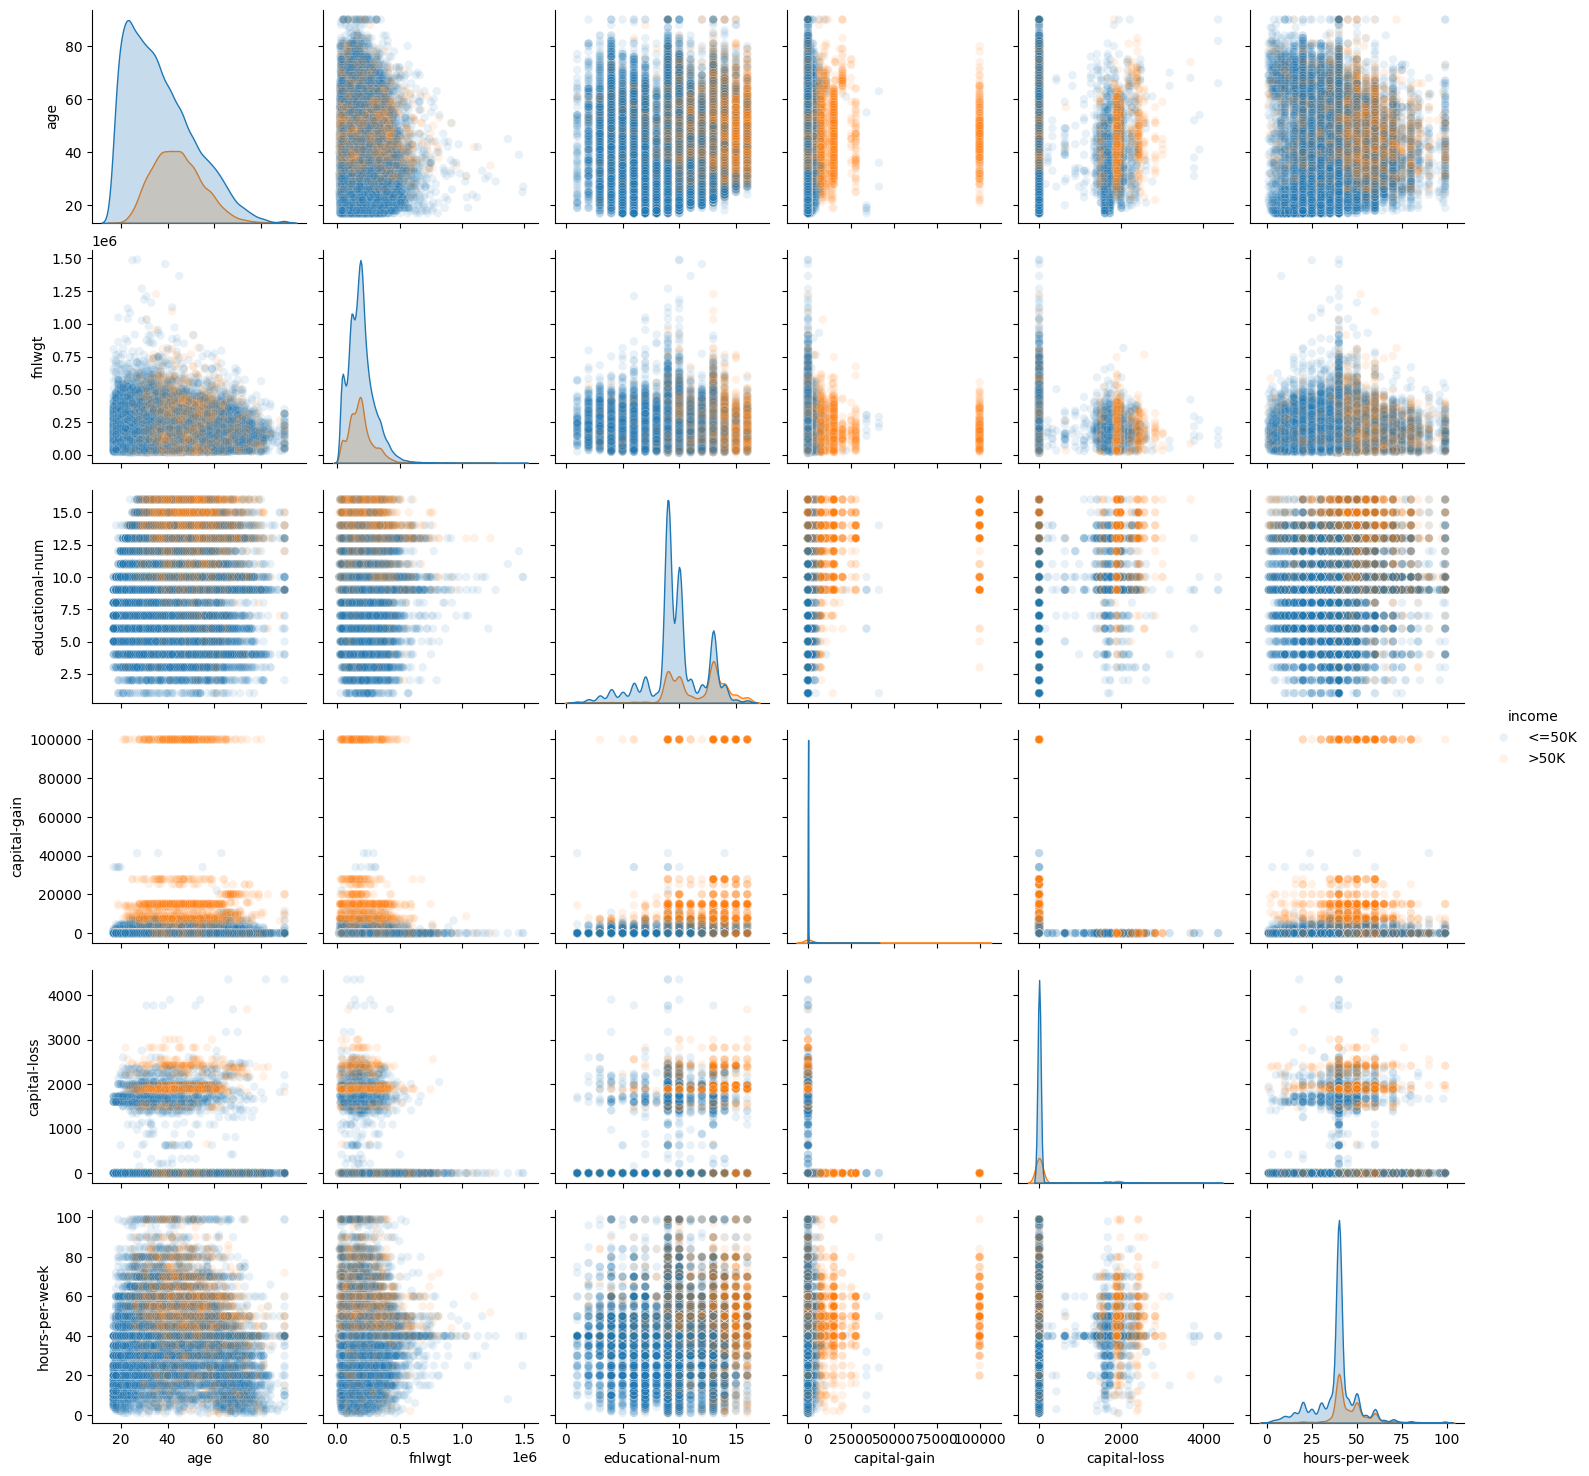

In [ ]:
sns.pairplot(data,hue='income',plot_kws={'alpha':0.1})

•The pair plot shows how different numeric features (like age, hours-per-week, capital-gain, etc.) are related to one another.

•Helps visually understand how income classes are distributed in the feature space.

In [ ]:
data.isnull().values.any()

np.False_

In [ ]:

# ----------------------------- Replace '?' with np.nan -----------------------------
data = data.replace(to_replace='?', value=np.nan)

# ----------------------------- Missing Value Analysis -----------------------------
print("\n ----Missing values---\n")
print(data.isna().sum())

print("\n ----Missing values in percentage---\n")
missing_percent = round((data.isna().sum() / data.shape[0]) * 100, 2)
print(missing_percent)
print("\n---Total {:.2f}% of missing values present in our dataset".format(sum(data.isna().sum()) / data.shape[0] * 100))


 ----Missing values---

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

 ----Missing values in percentage---

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

---Total 13.24% of missing values present in our dataset


In [ ]:
# Impute missing values with the most frequent value (mode) for each categorical column
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)

# Check if there are still missing values
print(data.isna().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


/tmp/ipython-input-11-1833210104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
/tmp/ipython-input-11-1833210104.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [ ]:
print(data['workclass'].value_counts())
print("--------------")
print(data['occupation'].value_counts())
print("--------------")
print(data['native-country'].value_counts())

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
--------------
occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
--------------
native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                  

<Axes: xlabel='income', ylabel='count'>

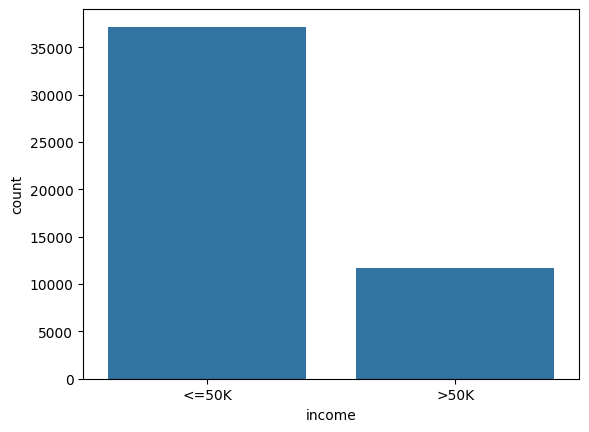

In [ ]:
sns.countplot(x='income',data=data)

Our dataset has more than 35000 people earning <=50K i.e. 75% and remainng 25% earns more than 50K.

In [ ]:
data.income.value_counts()

,count
income,
<=50K,37155
>50K,11687


<Axes: xlabel='age', ylabel='Density'>

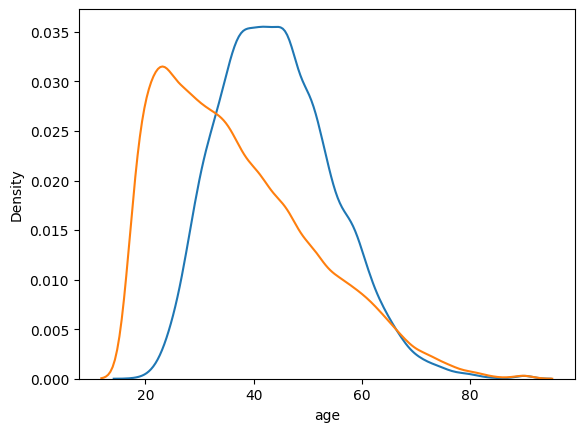

In [ ]:
sns.kdeplot(data.age[data['income']=='>50K'],label='>50K')
sns.kdeplot(data.age[data['income']=='<=50K'],label='<=50K')

<Axes: xlabel='income', ylabel='age'>

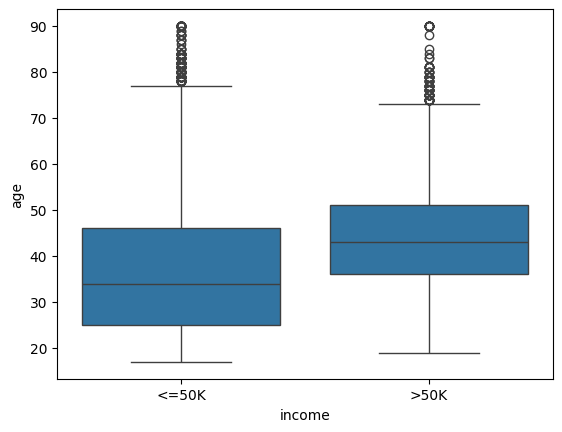

In [ ]:
sns.boxplot(x='income',y='age',data=data)

In [ ]:

def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

data['age_group'] = data['age'].apply(age_group)

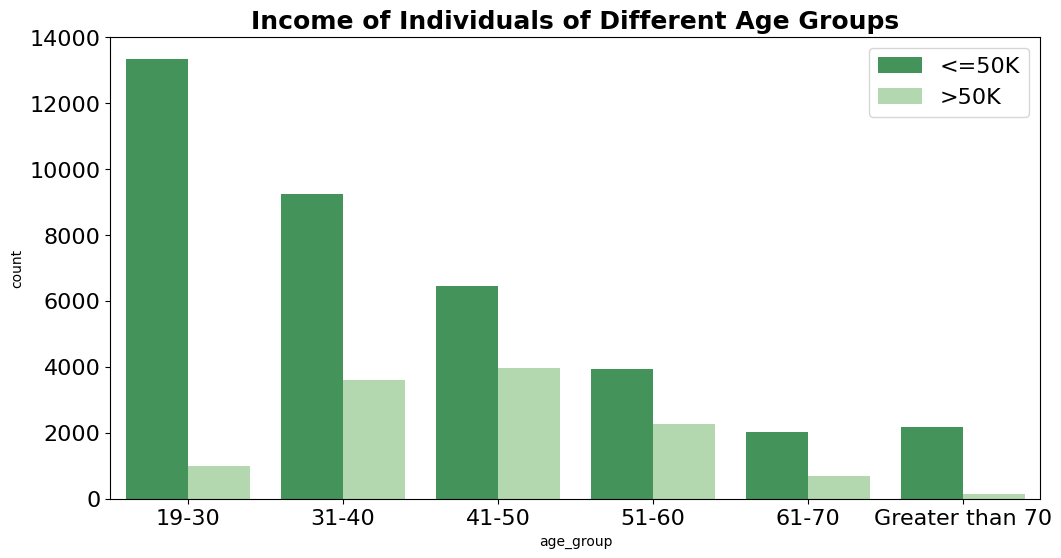

In [ ]:

plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

sns.countplot(
    x='age_group',
    hue='income',
    data=data,
    palette='Greens_r',
    order=order_list
)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

workclass         income
Federal-gov       <=50K       871
                  >50K        561
Local-gov         <=50K      2209
                  >50K        927
Never-worked      <=50K        10
Private           <=50K     29053
                  >50K       7652
Self-emp-inc      <=50K       757
                  >50K        938
Self-emp-not-inc  <=50K      2785
                  >50K       1077
State-gov         <=50K      1451
                  >50K        530
Without-pay       <=50K        19
                  >50K          2
Name: income, dtype: int64

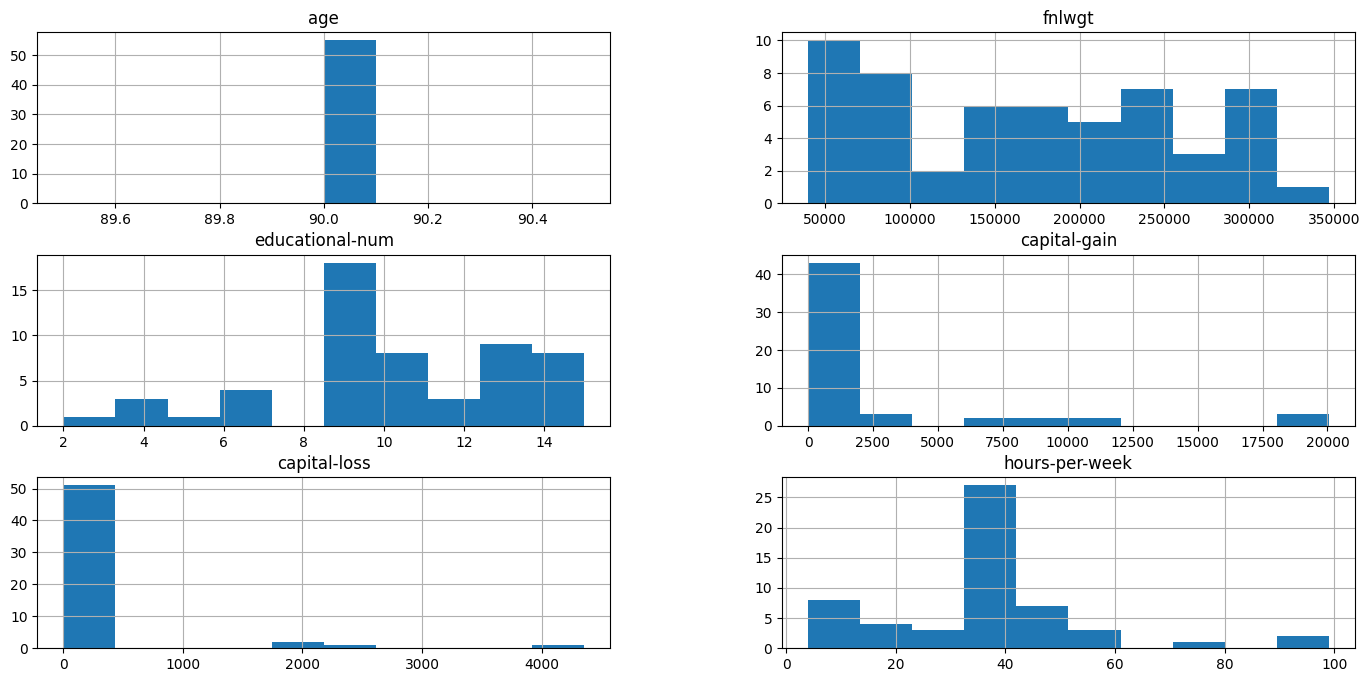

In [ ]:
data[data['age'] == 90].hist(figsize = (17,8))
data.groupby(['workclass','income'])['income'].count()

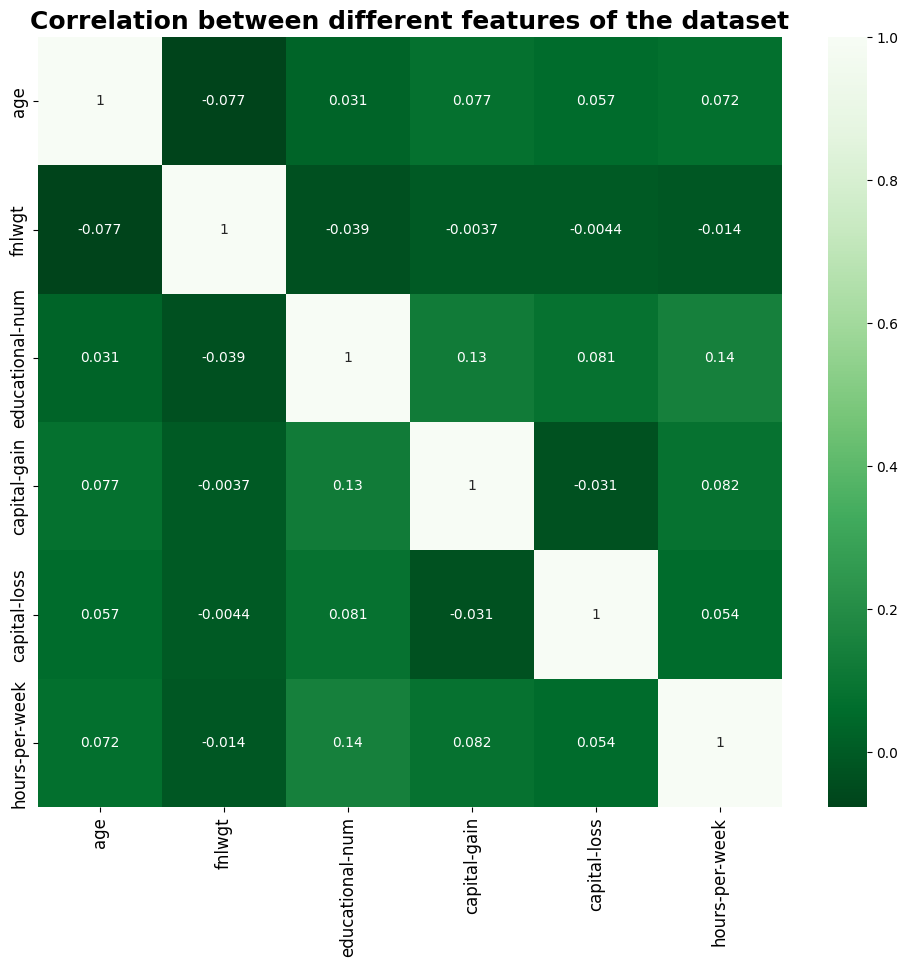

In [ ]:

plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Now plot the correlation heatmap
sns.heatmap(numeric_data.corr(), cmap = 'Greens_r', annot = True)

plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.show()

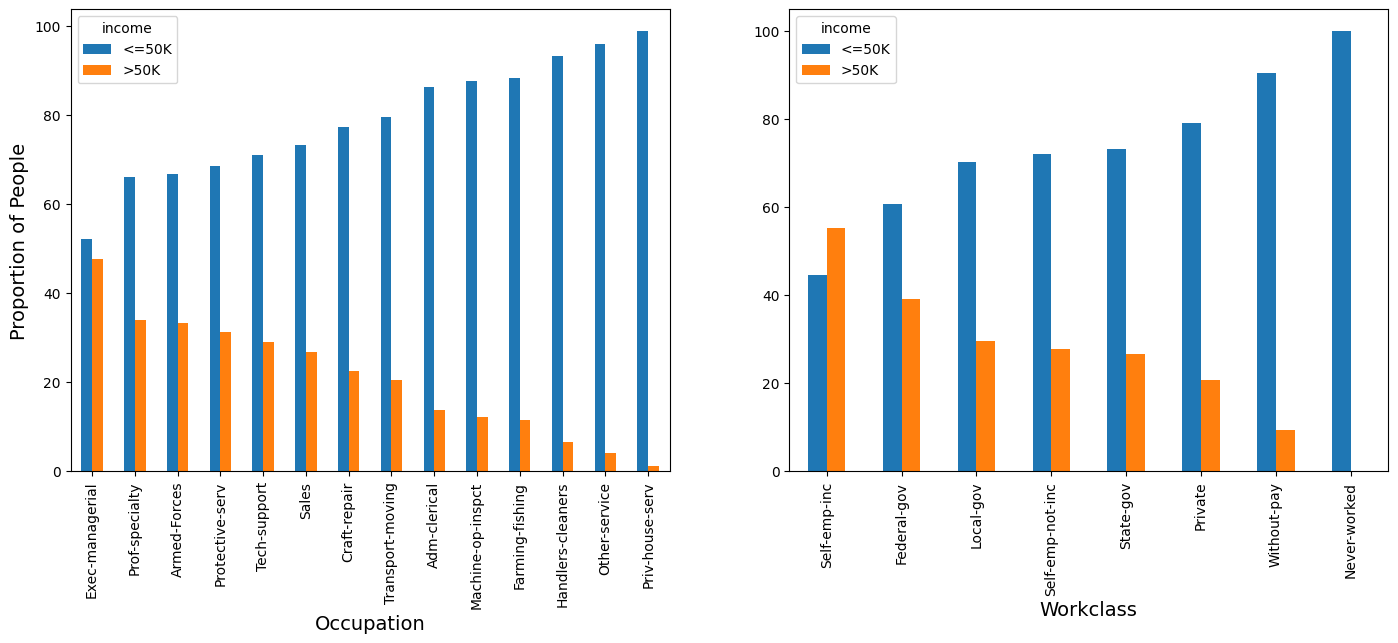

In [ ]:
table_occu = pd.crosstab(data['occupation'], data['income'])
table_workclass = pd.crosstab(data['workclass'], data['income'])
table_edu = pd.crosstab(data['education'], data['income'])
table_marital = pd.crosstab(data['marital-status'], data['income'])
table_race = pd.crosstab(data['race'], data['income'])
table_sex = pd.crosstab(data['gender'], data['income'])
table_country = pd.crosstab(data['native-country'], data['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);

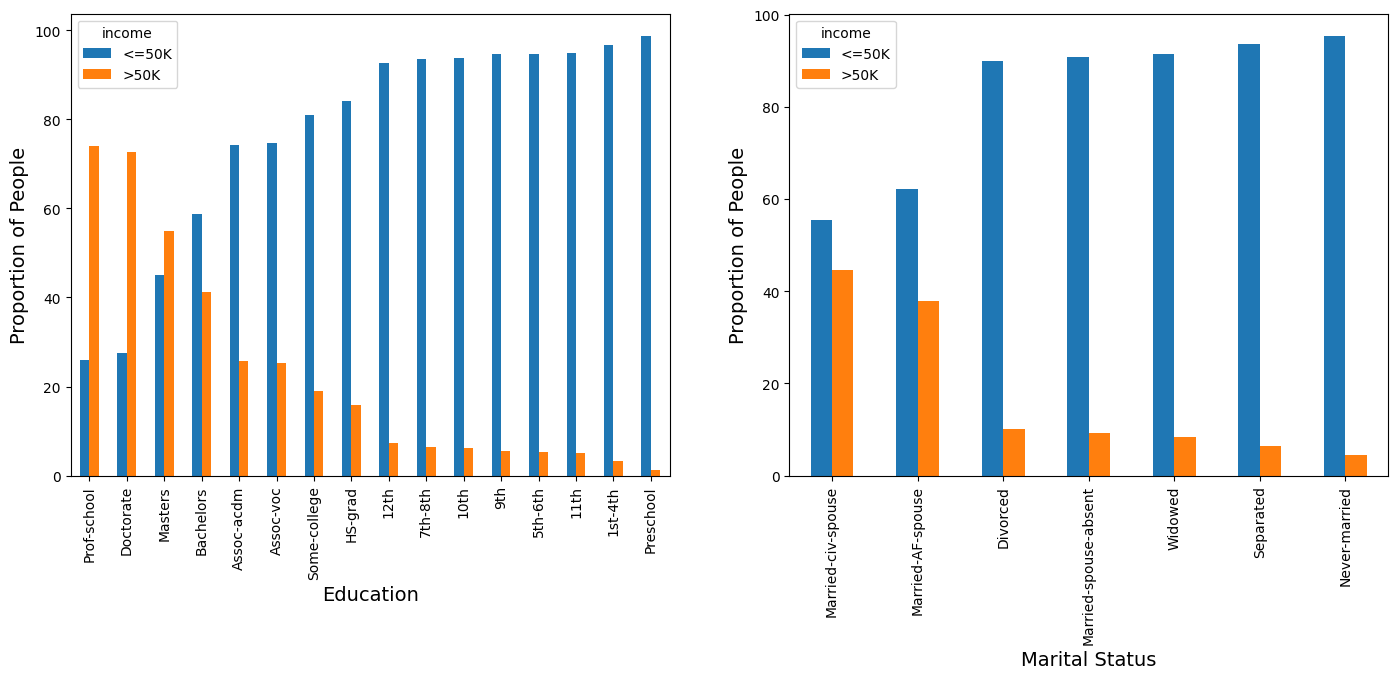

In [ ]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

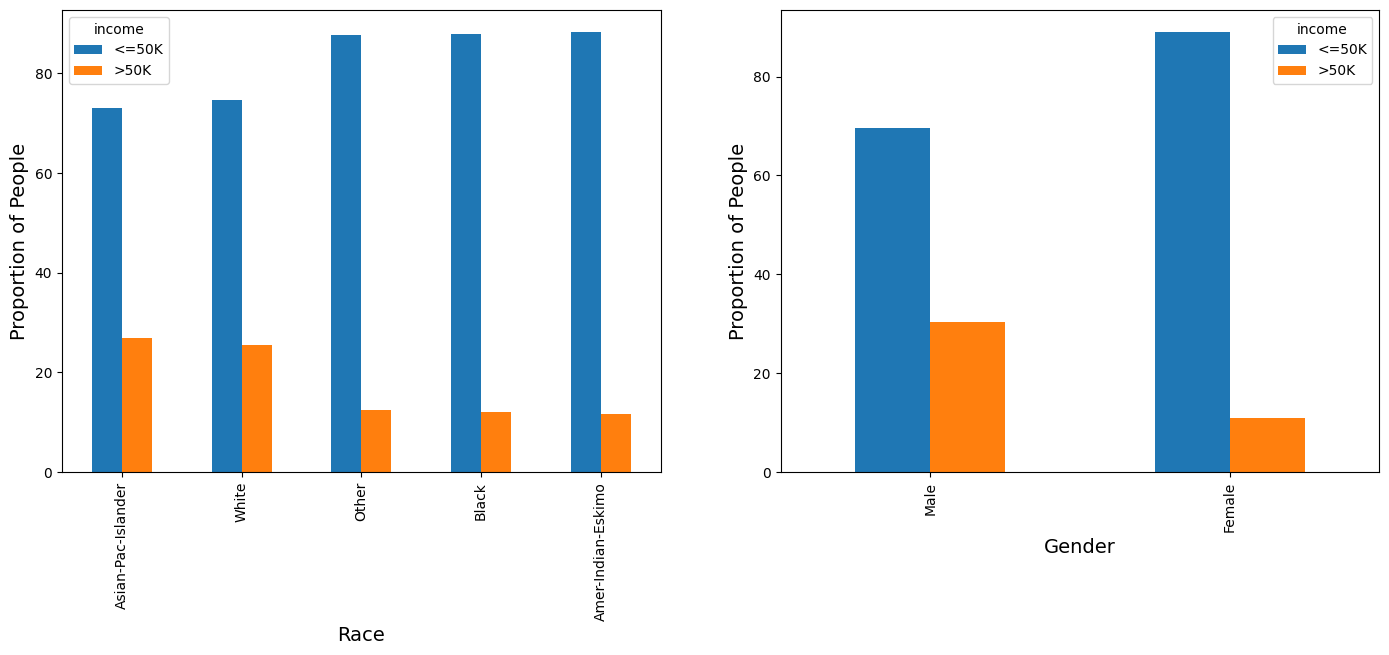

In [ ]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Gender',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

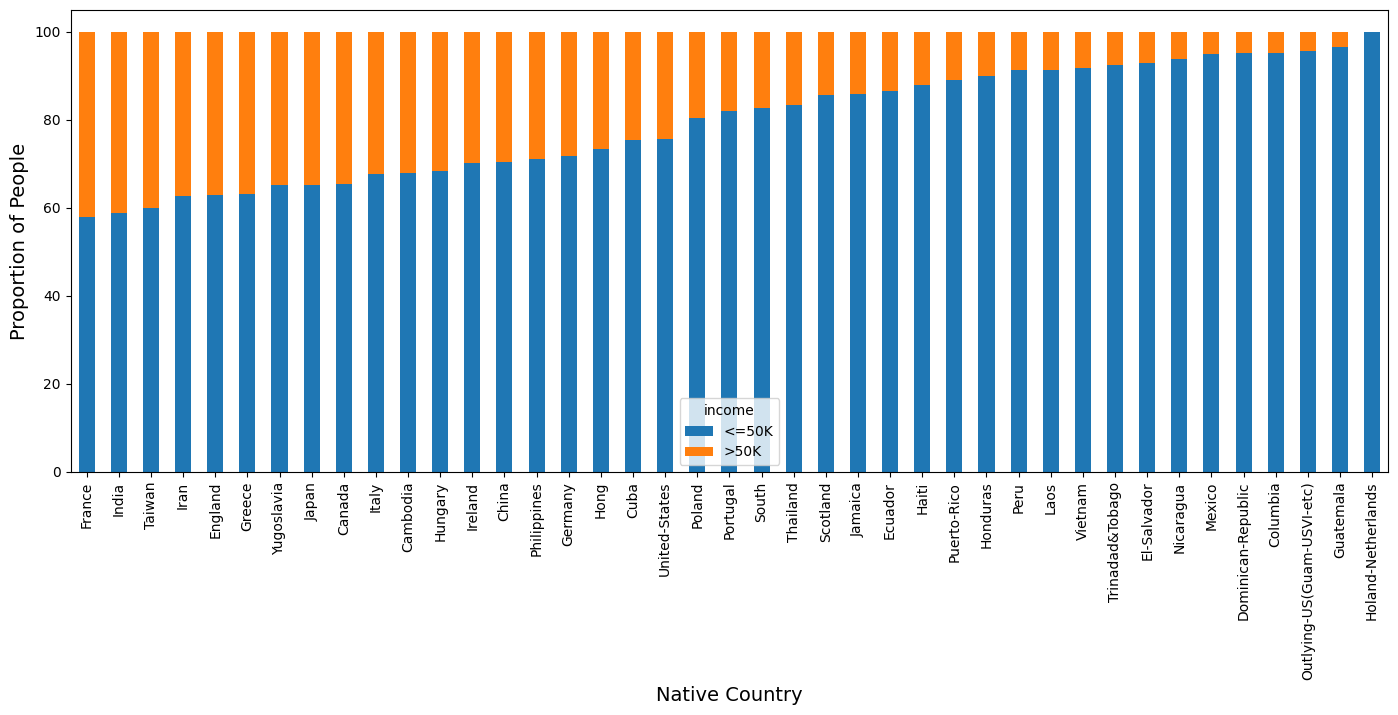

In [ ]:
table_country = pd.crosstab(data['native-country'], data['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Summary

1.Gender:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K

2.Race:- White and asain-pac-Islander earn salary more than 50K

3.marital_status:-41% of married people seem to earn salary greater than 50K

4.People having degree doctorate,prof-school,masters are making salary more than 50K.

5.Out of all the workclass only 59% self employed people are making salary more than 50K.

6.If I check by occupation, Proportion of people making salary less than 50K is higher.

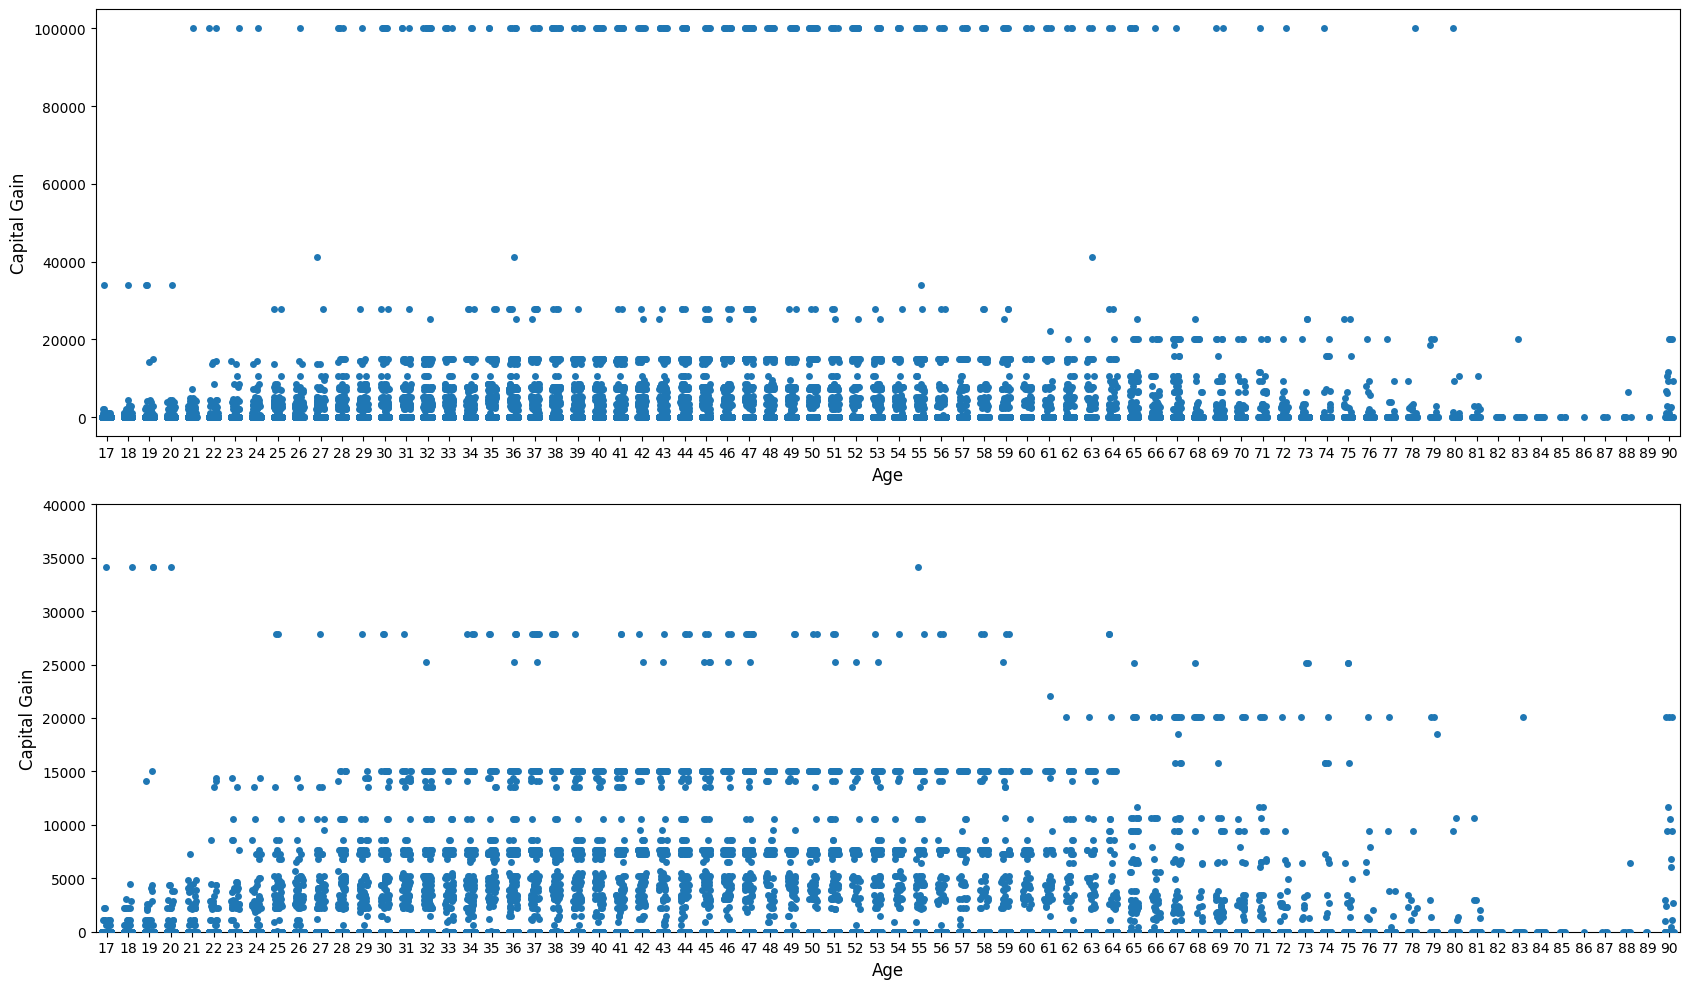

In [ ]:

fig = plt.figure(figsize=(17, 10))

# First subplot
ax1 = fig.add_subplot(2, 1, 1)
sns.stripplot(x='age', y='capital-gain', data=data, jitter=0.2, ax=ax1)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Capital Gain', fontsize=12)

# Second subplot
ax2 = fig.add_subplot(2, 1, 2)
sns.stripplot(x='age', y='capital-gain', data=data, jitter=0.2, ax=ax2)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Capital Gain', fontsize=12)
ax2.set_ylim(0, 40000)

plt.tight_layout()
plt.show()

•Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90

•Age 90 doesn't follow the pattern.

•Capital.gain of 99999 is clearly a outlier let's remove it.

Preparing Data for ML Algorithms

Feature Removal

•Education num and education are giving similar information

•Relationship and marital status imply similar information.Hence keeping only one of the two.

In [ ]:
# drop rows with age 90
print("Number of observation before removing:",data.shape)
index_age = data[data['age'] == 90].index
data.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

Number of observation before removing: (48842, 16)
Number of observation after removing: (48787, 16)


In [ ]:
print(f"Number of columns before deleting: {data.shape[1]}")

del_cols = ['relationship','educational-num','age_group','fnlwgt']
data.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {data.shape[1]}")

Number of columns before deleting: 16
Number of columns after deleting: 12


In [ ]:
print("Number of observation before removing:",data.shape)
index_gain = data[data['capital-gain'] == 99999].index
data.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

Number of observation before removing: (48787, 12)
Number of observation after removing: (48543, 12)


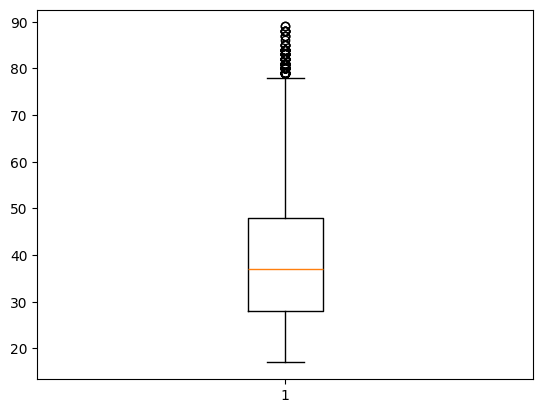

In [ ]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

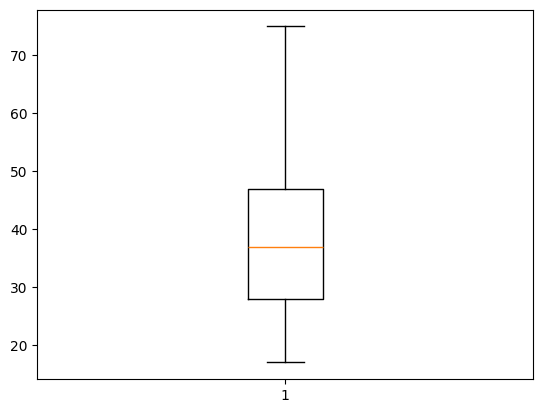

In [ ]:
data=data[(data['age']<=75)&(data['age']>=17)]

plt.boxplot(data['age'])
plt.show()

In [ ]:
data.shape

(48227, 12)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DECLARING DEPENDENT AND INDEPENDENT VARIABLE**




In [ ]:
# ----------------------------- Feature Separation -----------------------------
X = data.drop('income', axis=1)
y = data['income']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [ ]:
# ----------------------------- Preprocessor -----------------------------
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), cat_cols)
])


In [ ]:
# ----------------------------- Train-Test Split -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(38581, 11)

In [ ]:
X_test.shape

(9646, 11)

In [ ]:
# ----------------------------- Models -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(),
}

Model Evaluation

In [ ]:
results = []
best_model = None
best_f1 = 0

for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    f1 = f1_score(y_test, y_pred,pos_label='>50K')
    if f1 > best_f1:
        best_f1 = f1
        best_model = pipe

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred,pos_label='>50K'),
        "Recall": recall_score(y_test, y_pred,pos_label='>50K'),
        "F1 Score": f1,
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

In [ ]:
# ----------------------------- Results DataFrame -----------------------------
results_df = pd.DataFrame(results)
print("\n--- Model Comparison ---\n")
print(results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True))

print(f"\n Best Model based on F1 Score : {best_model.named_steps['classifier'].__class__.__name__}")


--- Model Comparison ---

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0    Gradient Boosting  0.864089   0.795666  0.567079  0.662200  0.916013
1        Random Forest  0.845843   0.695238  0.612092  0.651021  0.882139
2                  SVM  0.855069   0.763990  0.554281  0.642455  0.890300
3  Logistic Regression  0.846361   0.714442  0.576346  0.638007  0.898037
4                  KNN  0.833195   0.656652  0.607679  0.631217  0.860310
5        Decision Tree  0.823865   0.630585  0.604148  0.617084  0.773571
6             AdaBoost  0.843562   0.731498  0.527802  0.613176  0.893626
7          Naive Bayes  0.456873   0.294711  0.941748  0.448932  0.775692

 Best Model based on F1 Score : GradientBoostingClassifier


/tmp/ipython-input-41-3370363878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Blues')
/tmp/ipython-input-41-3370363878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Blues')
/tmp/ipython-input-41-3370363878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Blues')
/tmp/ipython-input-41-3370363878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

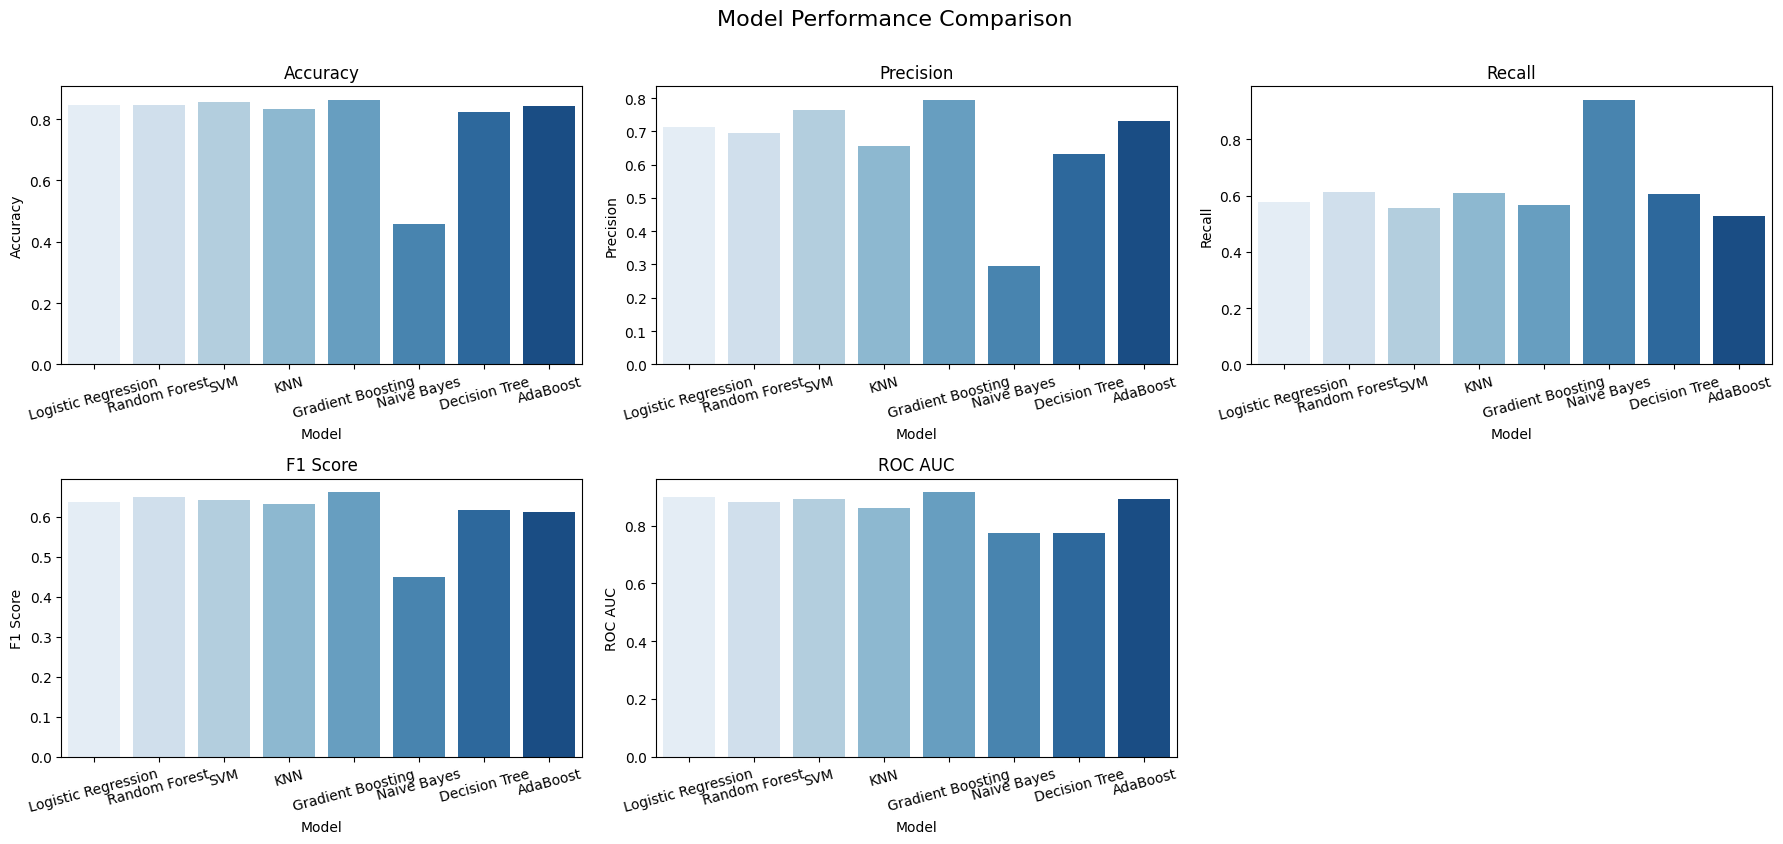


Confusion Matrix for Best Model : GradientBoostingClassifier


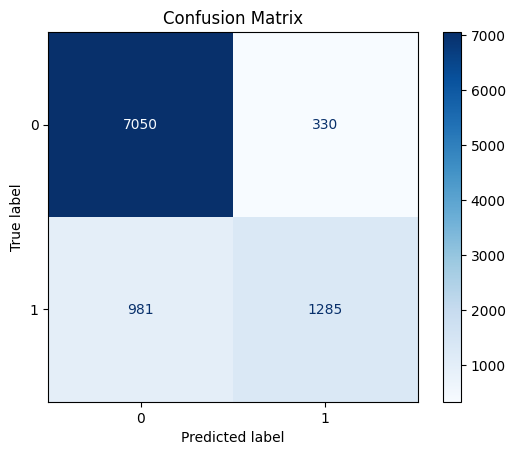

In [ ]:
# ------------------ Visualization ------------------
plt.figure(figsize=(18, 8))
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=results_df, palette='Blues')
    plt.title(metric)
    plt.xticks(rotation=15)
plt.tight_layout()
plt.suptitle("Model Performance Comparison", fontsize=16, y=1.05)
plt.show()
print(f"\nConfusion Matrix for Best Model : {best_model.named_steps['classifier'].__class__.__name__}")
# Confusion Matrix for best model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


ROC Curve and Precision -Recall Curve for Best Model : GradientBoostingClassifier


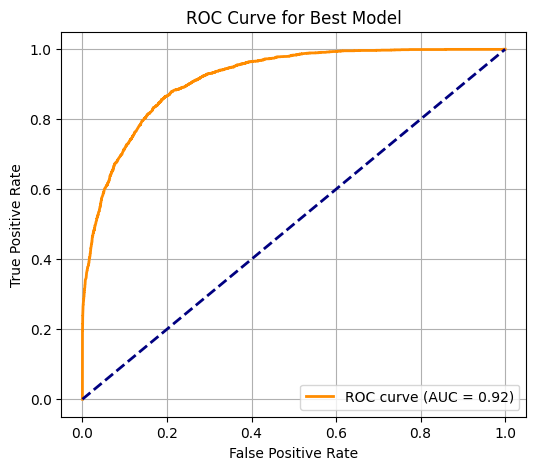

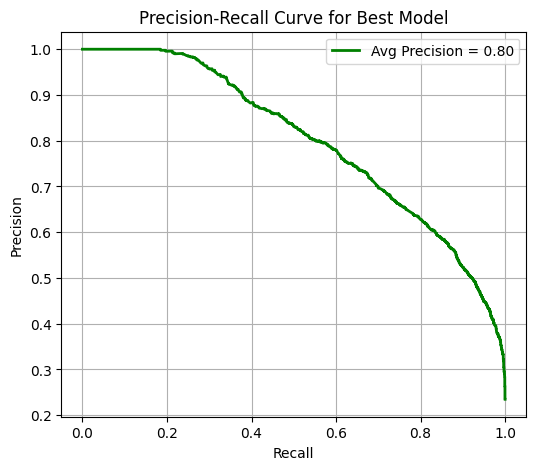

In [ ]:
print(f"\nROC Curve and Precision -Recall Curve for Best Model : {best_model.named_steps['classifier'].__class__.__name__}")


from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    average_precision_score
)

# Predict probabilities for ROC and PR curve
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba_best, pos_label='>50K')
roc_auc = roc_auc_score(y_test, y_proba_best)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba_best, pos_label='>50K')
avg_precision = average_precision_score(y_test, y_proba_best, pos_label='>50K')

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Best Model')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [ ]:
# ------------------ Save Best Model ------------------
import joblib
joblib.dump(best_model, "salary_model.pkl")

['salary_model.pkl']

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.82.201.225


In [ ]:
%%writefile app.py
import joblib
import streamlit as st
import pandas as pd
from matplotlib import pyplot as plt
# ------------------ Streamlit App ------------------
st.title("Employee Salary Prediction")
st.write("Predict whether an employee earns more than 50K/year based on their profile.")

# Load the trained model
model = joblib.load("salary_model.pkl")

# Sample category lists (same as used during training)
workclass_list = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Federal-gov', 'Self-emp-inc', 'Without-pay']
education_list = ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Doctorate', '5th-6th']
marital_status_list = ['Never-married', 'Married-civ-spouse', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent']
occupation_list = ['Tech-support', 'Craft-repair', 'Machine-op-inspct','Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners']
race_list = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
country_list = ['United-States', 'Mexico', 'Philippines', 'Germany', 'Canada']

# User Inputs
age = st.number_input("Age", min_value=18, max_value=90, value=30)
workclass = st.selectbox("Workclass", workclass_list)
education = st.selectbox("Education", education_list)
marital_status = st.selectbox("Marital Status", marital_status_list)
occupation = st.selectbox("Occupation", occupation_list)
race = st.selectbox("Race", race_list)
gender = st.selectbox("Gender", ['Male', 'Female'])
capital_gain = st.number_input("Capital Gain", min_value=0, value=0)
capital_loss = st.number_input("Capital Loss", min_value=0, value=0)
hours_per_week = st.slider("Hours per Week", 1, 100, 40)
native_country = st.selectbox("Native Country", country_list)

# Create input DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'education': [education],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'race': [race],
    'gender': [gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country]
})

# Predict
if st.button("Predict Salary"):
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0]
    if prediction == '>50K':
        st.success(f"The employee is likely to earn >50K (Confidence: {proba[1]*100:.2f}%)")
        st.progress(min(proba[1], 1.0))
    else:
        st.warning(f"The employee is likely to earn <=50K (Confidence: {proba[0]*100:.2f}%)")
        st.progress(min(proba[0], 1.0))
# --- Bar Chart of Prediction Probabilities ---
    st.markdown("### Prediction Confidence")
    fig, ax = plt.subplots()
    ax.bar(['<=50K', '>50K'], proba, color=['orange', 'green'])
    ax.set_ylabel("Probability")
    st.pyplot(fig)
# Batch predictions
st.markdown("---")
st.markdown("####  Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")
if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.201.225:8501

⠧⠇⠏⠋⠙your url is: https://solid-corners-hope.loca.lt
  Stopping...
^C
